In [17]:
import numpy as np
import pandas as pd
import pickle as pkl
import xarray as xr
import copy
import os
import sys
sys.path.append(os.path.realpath('./split-data/'))
import return_period_tools
import metrics
import random

import matplotlib 
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [18]:
xr.__version__

'0.16.1'

In [19]:
with open('./model_output_for_analysis/nwm_chrt_v2_1d_local.p', 'rb') as fb:
    nwm_results = pkl.load(fb)
    
with open('./model_output_for_analysis/lstm_time_split.p', 'rb') as fb:
    lstm_results_time_split = pkl.load(fb)
with open('./model_output_for_analysis/mclstm_time_split.p', 'rb') as fb:
    mclstm_results_time_split = pkl.load(fb)
with open('./model_output_for_analysis/sacsma_time_split.p', 'rb') as fb:
    sacsma_results_time_split = pkl.load(fb)
    
with open('./model_output_for_analysis/lstm_return_period_split.p', 'rb') as fb:
    lstm_results_return_period_split = pkl.load(fb)
with open('./model_output_for_analysis/mclstm_return_period_split', 'rb') as fb:
    mclstm_results_return_period_split = pkl.load(fb)
with open('./model_output_for_analysis/sacsma_results_return_period_split.p', 'rb') as fb:
    sacsma_results_return_period_split = pkl.load(fb)

train_split_type_model_set = {'time_split':{'nwm':nwm_results, 
                                           'lstm':lstm_results_time_split,
                                            'mc:'mclstm_results_time_split,
                                            'sac':sacsma_results_time_split},
                              'return_period_split':{'nwm':nwm_results, 
                                           'lstm':lstm_results_return_period_split,
                                            'mc:'mclstm_results_return_period_split,
                                            'sac':sacsma_results_return_period_split}}

In [20]:
# Convert flow to   CFS mm -> ft     km^2 -> ft^2    hr->s
conversion_factor = 0.00328084 * 10763910.41671 / 3600 / 24

In [21]:
# Get a list of all the basins in the analysis
basin_list = list(lstm_results_time_split.keys())

# Camels attributes with RI information
dataName = '../data/camels_attributes.csv.csv'
# load the data with pandas
pd_attributes = pd.read_csv(dataName, sep=',', index_col='gauge_id')

# Add the basin ID as a 8 element string with a leading zero if neccessary
basin_id_str = []
for a in pd_attributes.index.values:
    basin_id_str.append(str(a).zfill(8))
pd_attributes['basin_id_str'] = basin_id_str

basin 01434025
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 01047000
basin 01170100
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
recurrance_interval: 771.976855292494


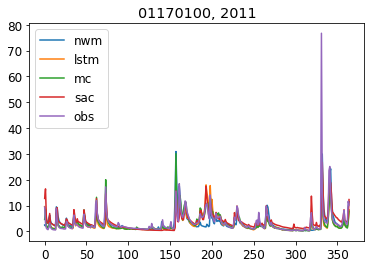

RI is None, Skipping
RI is None, Skipping
basin 01365000
basin 01139000
recurrance_interval: 80.99065125749192


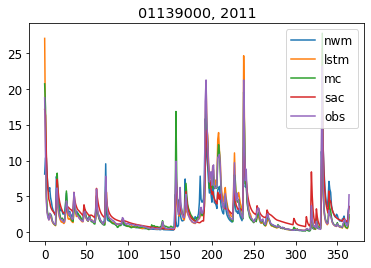

basin 01350140
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 01195100
basin 01137500
recurrance_interval: 57.525167260676554


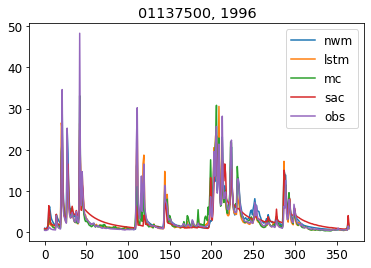

RI is None, Skipping
basin 01484100
recurrance_interval: 426.9817909369439


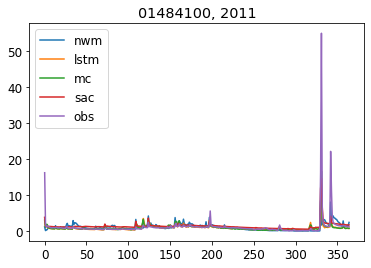

basin 01423000
recurrance_interval: 90.91898269533297


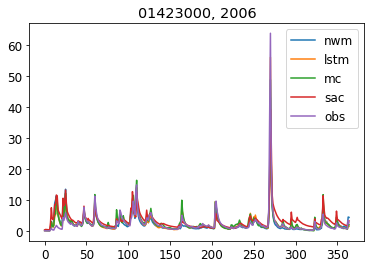

basin 01350000
RI is None, Skipping
recurrance_interval: 672.216282266687


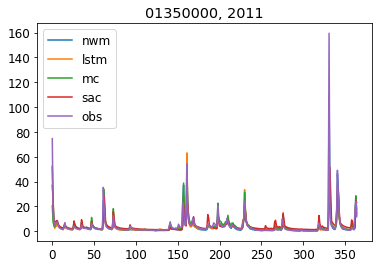

basin 01162500
basin 01187300
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 01031500
basin 01054200
recurrance_interval: 162.4081270592211


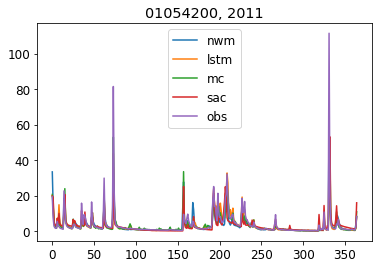

basin 01435000
RI is None, Skipping
recurrance_interval: 61.65842362560393


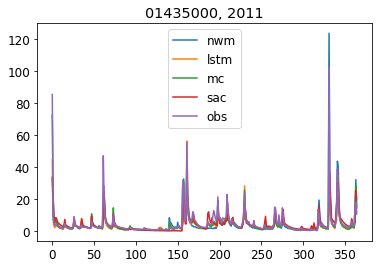

basin 01439500
basin 01139800
basin 01415000
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 01466500
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 01123000
basin 01414500
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is N

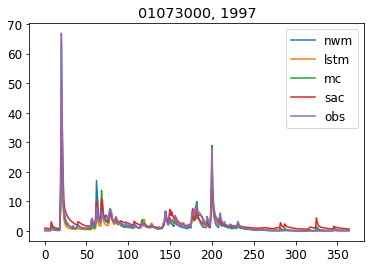

recurrance_interval: 183.8315894369706


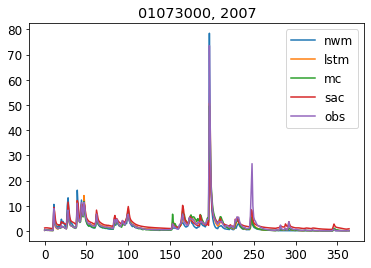

basin 01451800
basin 01440400
recurrance_interval: 87.63134507815357


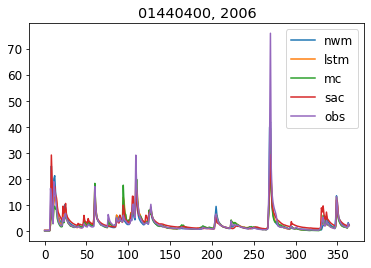

basin 01078000
basin 01181000
recurrance_interval: 133.91636145887006


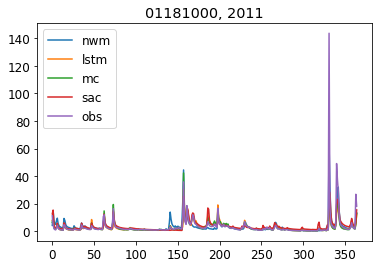

basin 01055000
basin 01440000
recurrance_interval: 417.3873840718386


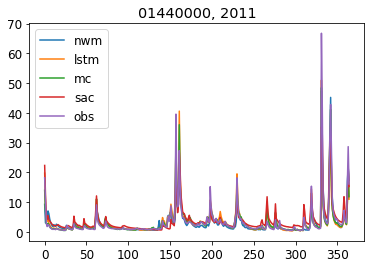

basin 01169000
recurrance_interval: 56.07654289697123


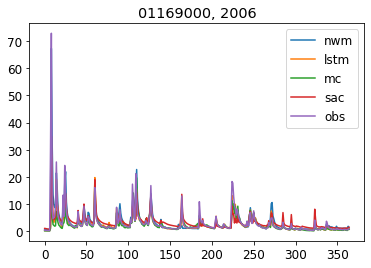

recurrance_interval: 355.9868517165814


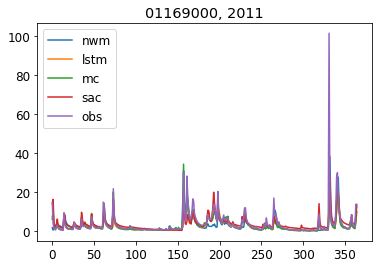

basin 01413500
recurrance_interval: 73.40549414886506


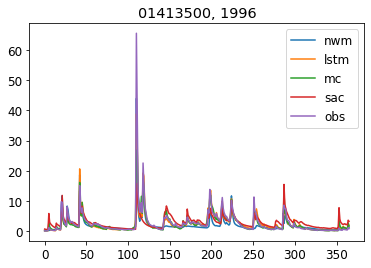

recurrance_interval: 231.24200583778816


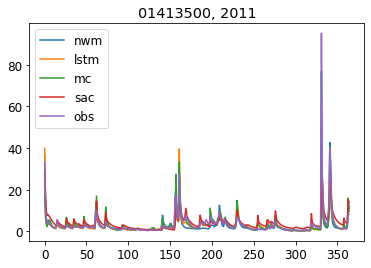

basin 01052500
recurrance_interval: 770.3239419138638


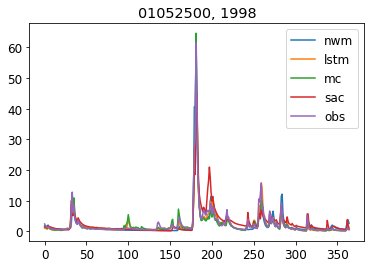

basin 01057000
basin 01022500
basin 01350080
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 01144000
recurrance_interval: 397.55503172079716


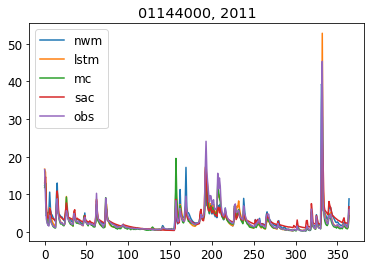

RI is None, Skipping
basin 01411300
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 01491000
recurrance_interval: 95.16277351905869


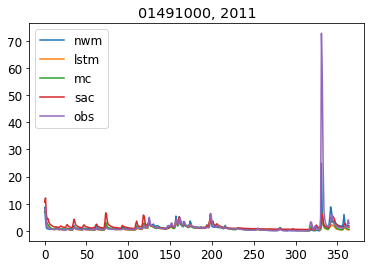

basin 01510000
RI is None, Skipping
basin 01516500
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 01532000
recurrance_interval: 170.23916209252826


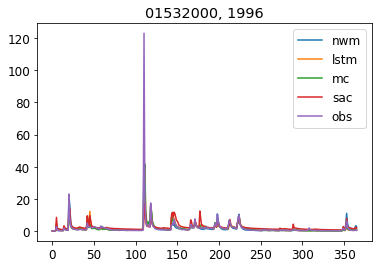

recurrance_interval: 144.33460289010867


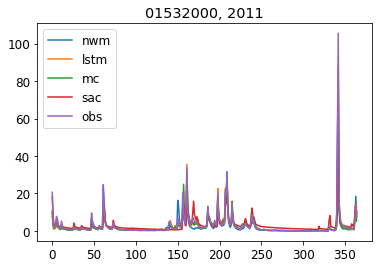

basin 01550000
recurrance_interval: 154.28602747734584


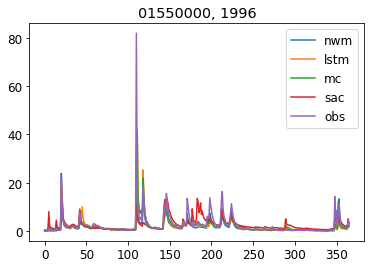

RI is None, Skipping
recurrance_interval: 75.20318562385135


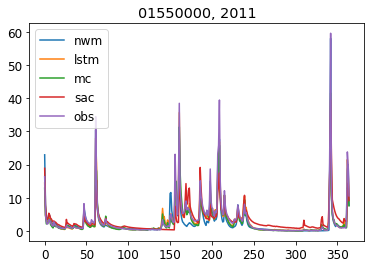

basin 01552000
recurrance_interval: 96.25633573986568


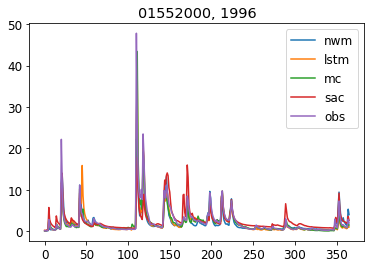

recurrance_interval: 262.984502897406


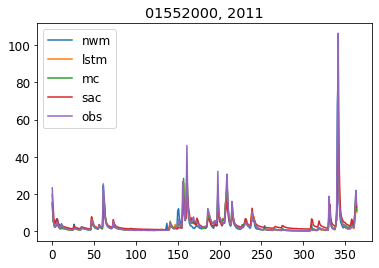

basin 01539000
recurrance_interval: 79.81331507866524


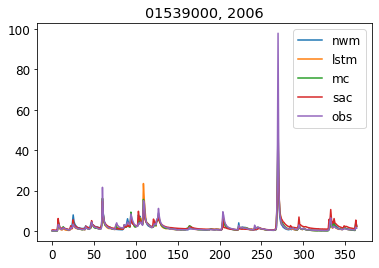

recurrance_interval: 226.27286526537856


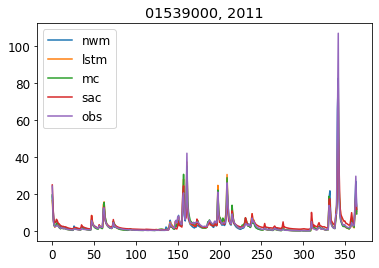

basin 01567500
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 01542810
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 01568000
basin 01543500
basin 01547700
recurrance_interval: 77.1967181929197


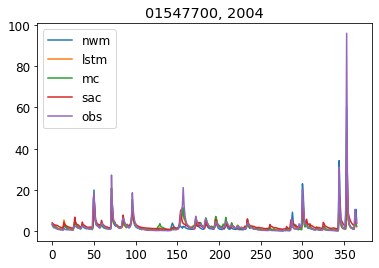

basin 01543000
basin 01549500
basin 01545600
basin 01548500
basin 01606500
recurrance_interval: 193.67604158724936


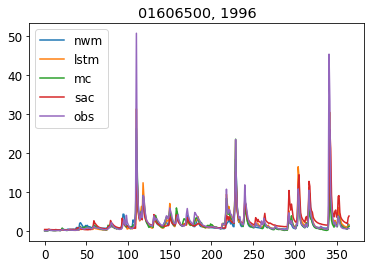

basin 01605500
recurrance_interval: 137.01895025241635


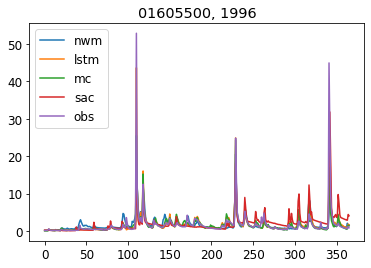

basin 01596500
recurrance_interval: 151.72923308378407


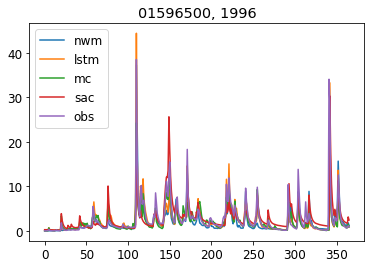

basin 01544500
basin 01583500
RI is None, Skipping
basin 01586610
RI is None, Skipping
basin 01580000
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 01591400
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 01644000
RI is None, Skipping
basin 01634500
recurrance_interval: 73.934310947486


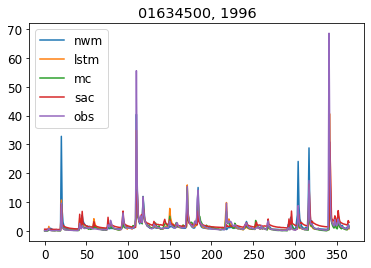

basin 01638480
basin 01639500
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 01667500
RI is None, Skipping
basin 01666500
basin 01669000
recurrance_interval: 60.347294798617256


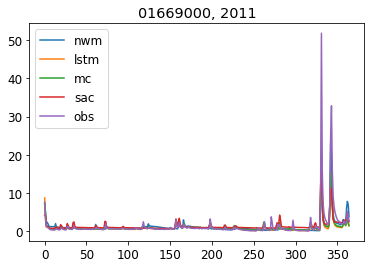

basin 01669520
recurrance_interval: 63.90186125211506


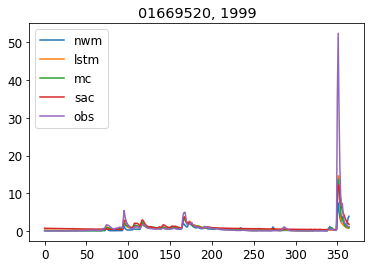

basin 02011400
recurrance_interval: 69.81519231800867


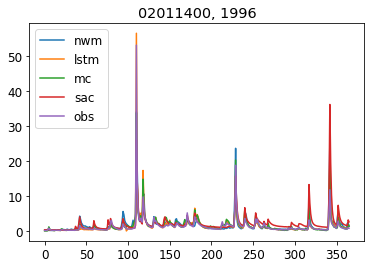

RI is None, Skipping
RI is None, Skipping
basin 02015700
recurrance_interval: 150.66063624352068


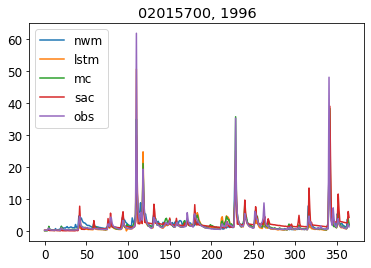

RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 02016000
basin 02028500
RI is None, Skipping
basin 02027000
RI is None, Skipping
basin 02017500
basin 02018000
basin 02038850
basin 02046000
basin 02064000
recurrance_interval: 516.7042825706709


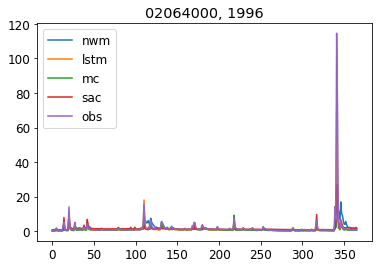

RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 02051500
RI is None, Skipping
RI is None, Skipping
basin 02053200
recurrance_interval: 338.57332652018397


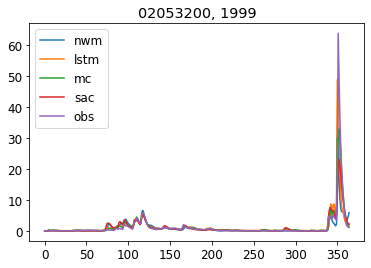

basin 02059500
basin 02065500
recurrance_interval: 204.452923076923


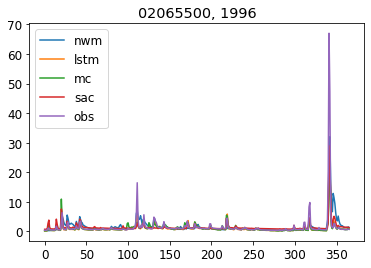

basin 02056900
basin 02074500
RI is None, Skipping
basin 02070000
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 02069700
RI is None, Skipping
basin 02081500
recurrance_interval: 153.4001603849238


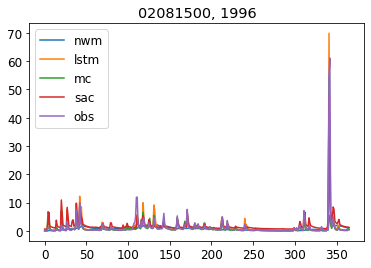

RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 02082950
recurrance_interval: 421.2285236429983


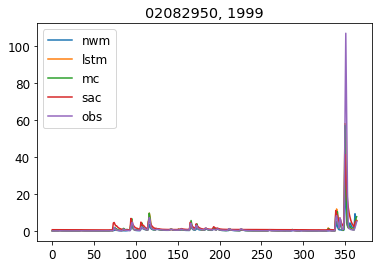

RI is None, Skipping
RI is None, Skipping
basin 02096846
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 02111180
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 02092500
basin 02112120
basin 02111500
water year not in record
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 02102908
recurrance_interval: 61.764436632611954


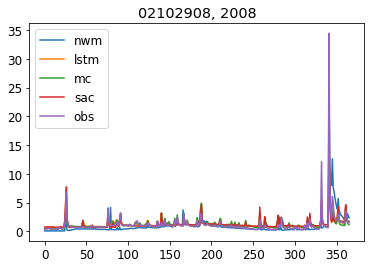

basin 02118500
RI is None, Skipping
basin 02125000
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
water year not in record
water year not in record
water year not in record
basin 02112360
RI is None, Skipping
basin 02137727
recurrance_interval: 71.78493033021569


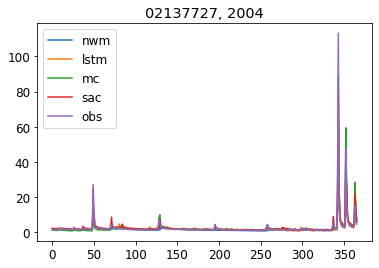

basin 02140991
recurrance_interval: 70.3600978439576


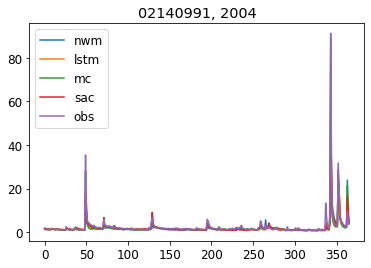

basin 02143000
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 02152100
water year not in record
recurrance_interval: 187.81523937963584


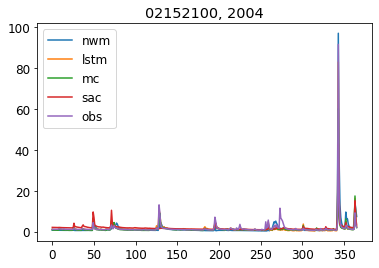

RI is None, Skipping
basin 02177000
RI is None, Skipping
recurrance_interval: 138.14151890264299


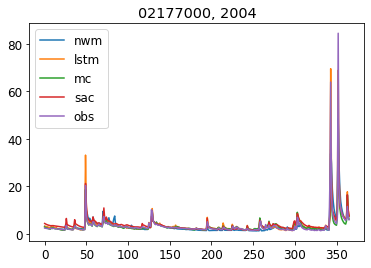

basin 02193340
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 02215100
recurrance_interval: 83.58238915157465


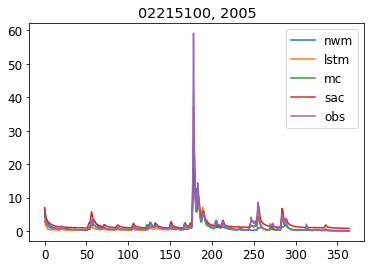

basin 02196000
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
no data, skipping
no data, skipping
basin 02198100
RI is None, Skipping
RI is None, Skipping
basin 02178400
RI is None, Skipping
no data, skipping
basin 02216180
recurrance_interval: 65.4422007220764


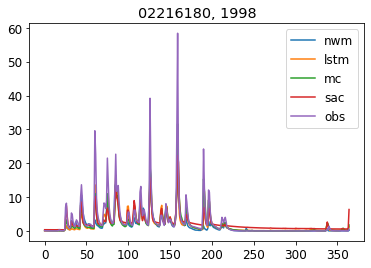

basin 02212600
RI is None, Skipping
basin 02202600
basin 02246000
basin 02245500
basin 02297155
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 02231000
recurrance_interval: 54.747484759875114


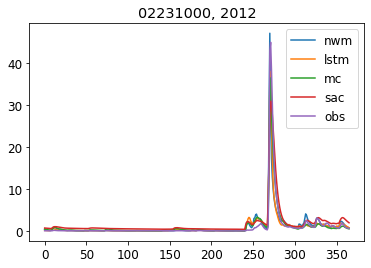

basin 02297310
recurrance_interval: 51.438960501826706


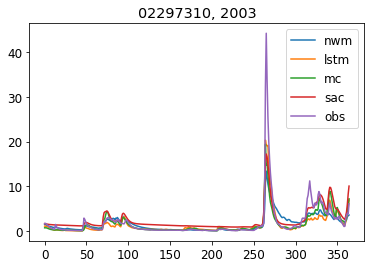

basin 02298123
basin 02342933
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
water year not in record
water year not in record
basin 02298608
recurrance_interval: 62.13541666666666


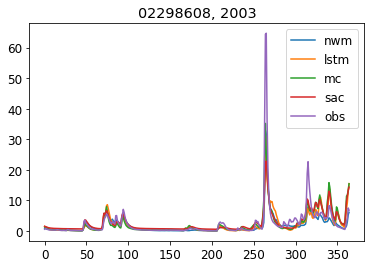

RI is None, Skipping
basin 02299950
recurrance_interval: 187.76231478263423


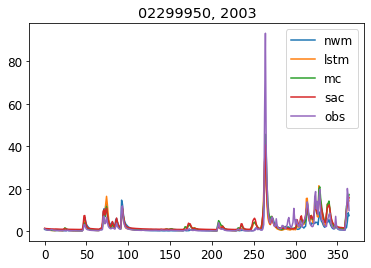

water year not in record
basin 02296500
RI is None, Skipping
RI is None, Skipping
basin 02300700
basin 02350900
basin 02349900
basin 02361000
RI is None, Skipping
basin 02363000
basin 02384540
basin 02371500
basin 02374500
RI is None, Skipping
basin 02369800
recurrance_interval: 85.90889329017922


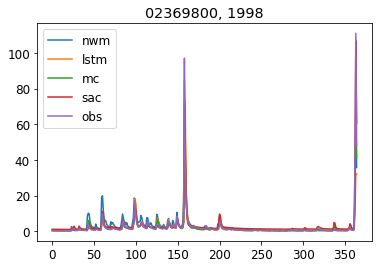

basin 02395120
RI is None, Skipping
basin 02415000
basin 02427250
basin 02430085
recurrance_interval: 61.26843018213355


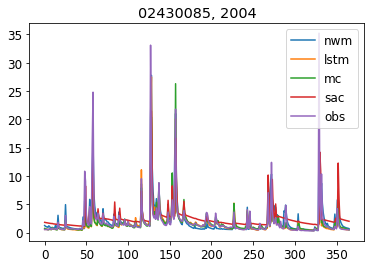

basin 02450250
RI is None, Skipping
RI is None, Skipping
basin 02464000
basin 02464360
basin 02465493
recurrance_interval: 117.06624422850297


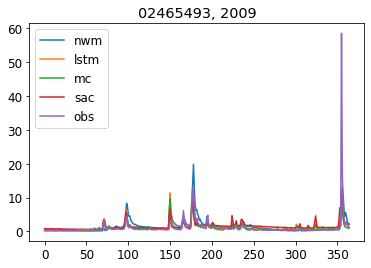

basin 02469800
basin 02479300
RI is None, Skipping
water year not in record
basin 02479155
RI is None, Skipping
basin 02472000
basin 02481510
RI is None, Skipping
RI is None, Skipping
recurrance_interval: 249.53659239339208


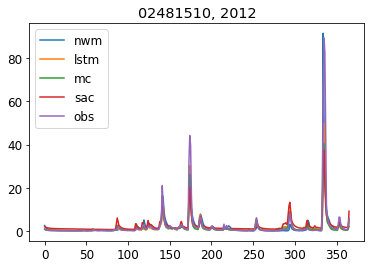

basin 02481000
RI is None, Skipping
RI is None, Skipping
basin 02472500
basin 02479560
RI is None, Skipping
basin 03010655
recurrance_interval: 64.25738759970997


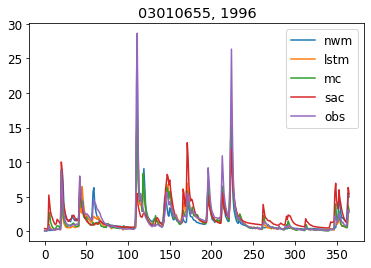

basin 03021350
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 03026500
RI is None, Skipping
RI is None, Skipping
basin 03028000
basin 03015500
basin 03011800
basin 03049800
recurrance_interval: 72.33595912587438


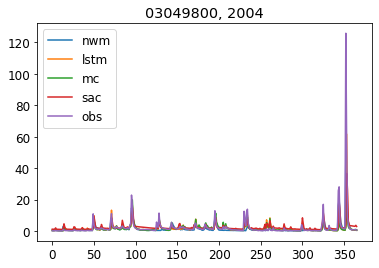

basin 03049000
RI is None, Skipping
RI is None, Skipping
recurrance_interval: 181.61903702880014


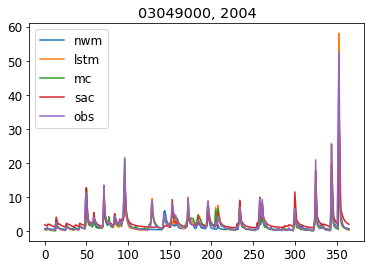

basin 03170000
basin 03069500
recurrance_interval: 69.68186190554397


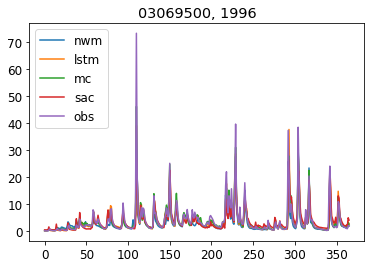

basin 03140000
basin 03078000
recurrance_interval: 91.7495831764643


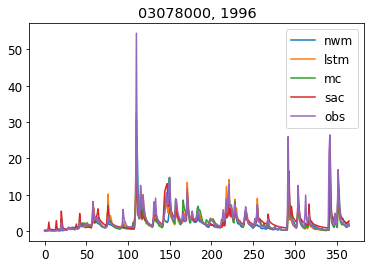

RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 03076600
recurrance_interval: 156.76843087588315


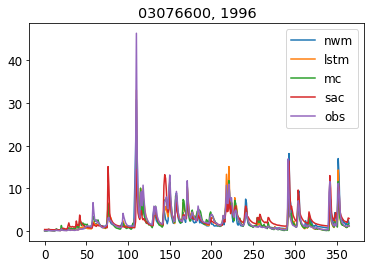

recurrance_interval: 59.950702939565474


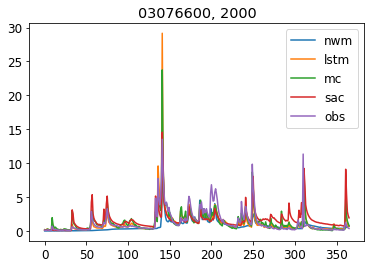

basin 03070500
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 03173000
RI is None, Skipping
basin 03182500
recurrance_interval: 160.7764374797051


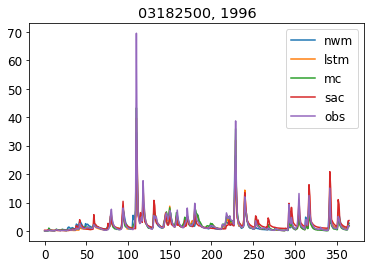

RI is None, Skipping
RI is None, Skipping
basin 03050000
recurrance_interval: 111.04316403923276


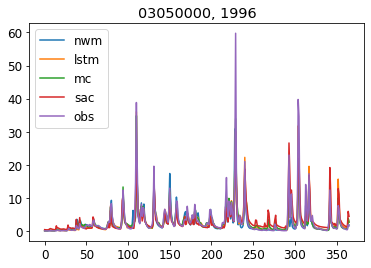

basin 03180500
recurrance_interval: 377.978680611424


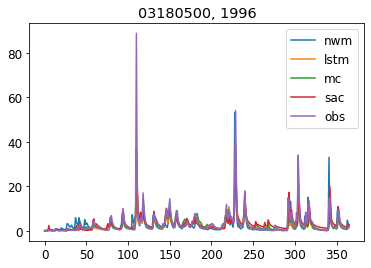

recurrance_interval: 67.06804703990349


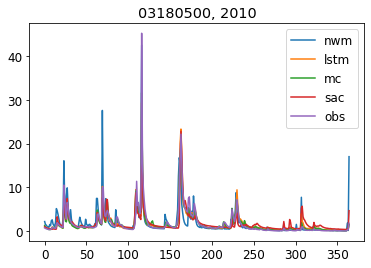

basin 03144000
basin 03237280
recurrance_interval: 73.03955478520407


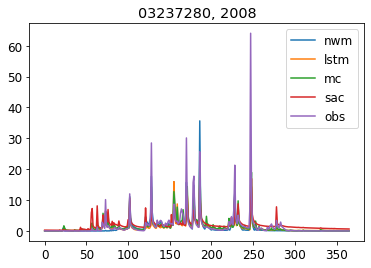

basin 03186500
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 03238500
RI is None, Skipping
water year not in record
basin 03237500
recurrance_interval: 328.9021825190541


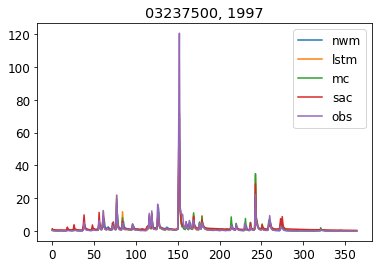

RI is None, Skipping
recurrance_interval: 52.2975040062157


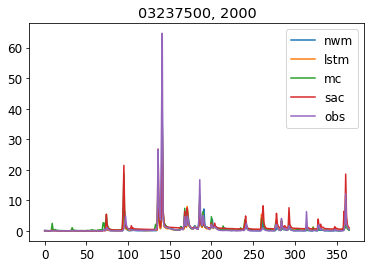

RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 03241500
basin 03280700
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
water year not in record
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 03281500
basin 03285000
recurrance_interval: 284.8000530539161


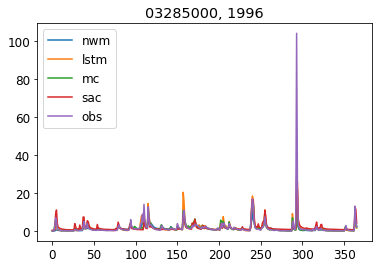

water year not in record
basin 03291780
RI is None, Skipping
basin 03338780
basin 03340800
RI is None, Skipping
basin 03346000
recurrance_interval: 580.2295644711437


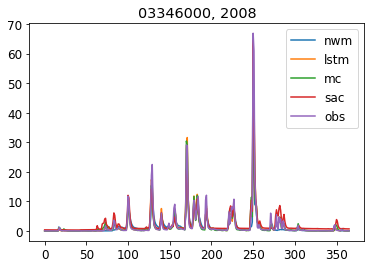

basin 03366500
basin 03368000
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 03384450
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 03456500
RI is None, Skipping
RI is None, Skipping
basin 03455500
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
recurrance_interval: 151.57918526470422


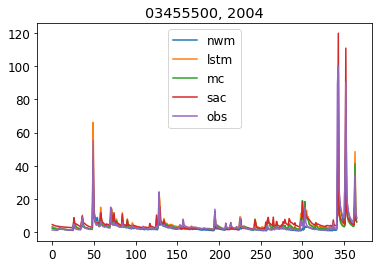

RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 03463300
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
recurrance_interval: 72.5011259570635


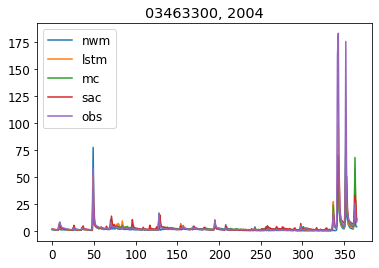

basin 03460000
basin 03471500
RI is None, Skipping
RI is None, Skipping
basin 03488000
RI is None, Skipping
basin 03500240
RI is None, Skipping
recurrance_interval: 77.66451325462242


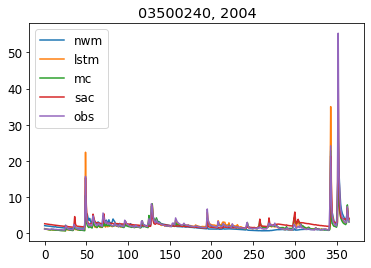

RI is None, Skipping
RI is None, Skipping
basin 03473000
RI is None, Skipping
basin 03498500
basin 03592718
basin 03574500
basin 03504000
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 03604000
recurrance_interval: 158.68700304807123


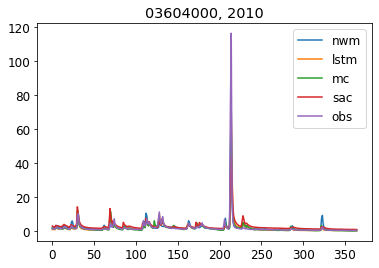

basin 03479000
RI is None, Skipping
RI is None, Skipping
basin 04024430
recurrance_interval: 86.48189477907619


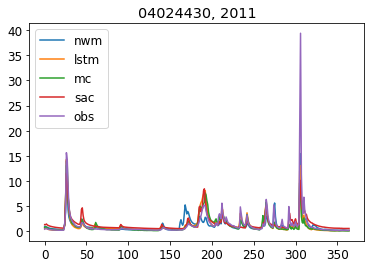

recurrance_interval: 83.97424645167762


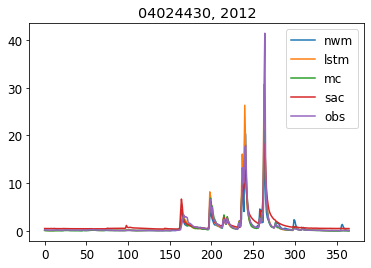

basin 04015330
RI is None, Skipping
RI is None, Skipping
recurrance_interval: 791.2120402868916


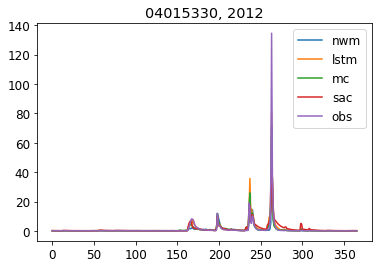

basin 04027000
RI is None, Skipping
RI is None, Skipping
basin 04040500
recurrance_interval: 88.63677183739445


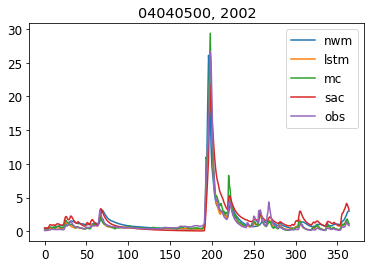

RI is None, Skipping
basin 04043050
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 04057510
RI is None, Skipping
basin 04057800
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 04045500
RI is None, Skipping
RI is None, Skipping
basin 04059500
recurrance_interval: 62.04972251233847


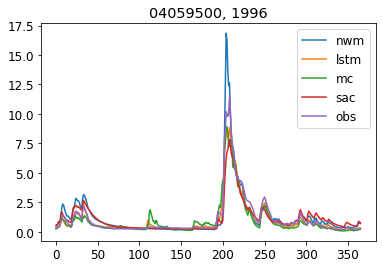

basin 04074950
recurrance_interval: 104.38820360130445


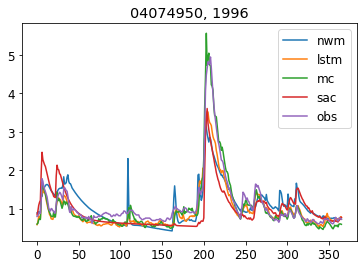

basin 04063700
recurrance_interval: 62.835082252669196


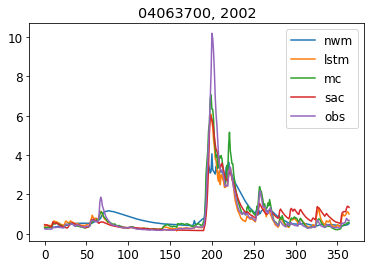

RI is None, Skipping
RI is None, Skipping
basin 04105700
recurrance_interval: 89.05361827721903


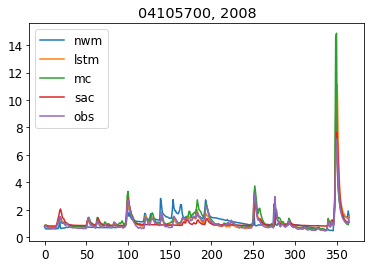

basin 04115265
RI is None, Skipping
basin 04122200
basin 04122500
basin 04127918
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
water year not in record
water year not in record
basin 04127997
RI is None, Skipping
basin 04161580
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 04185000
recurrance_interval: 78.81012559278756


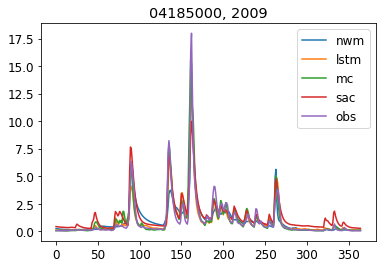

basin 04197100
RI is None, Skipping
recurrance_interval: 51.85554345054591


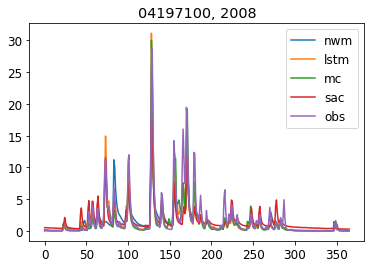

recurrance_interval: 58.80948517651425


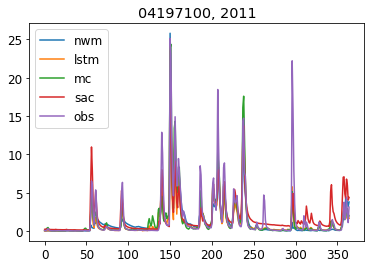

basin 04196800
recurrance_interval: 63.800744146651326


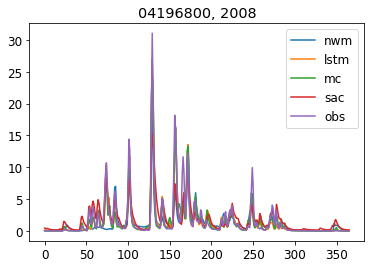

RI is None, Skipping
basin 04213075
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 04213000
RI is None, Skipping
basin 04197170
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
no data, skipping
basin 04216418
recurrance_interval: 264.00383308650595


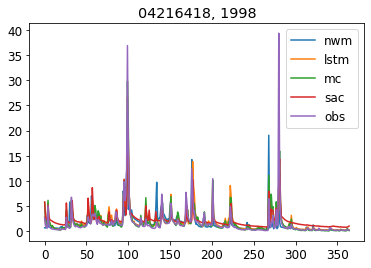

RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 04221000
recurrance_interval: 59.39330644386825


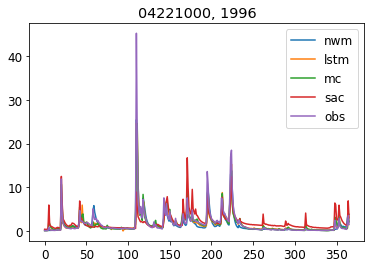

RI is None, Skipping
RI is None, Skipping
basin 04224775
basin 04233000
recurrance_interval: 128.50167271691936


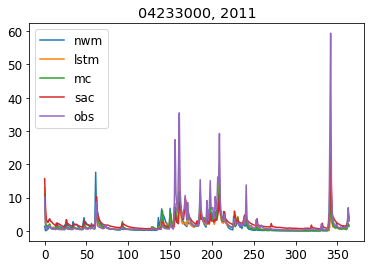

water year not in record
basin 05291000
basin 04256000
RI is None, Skipping
RI is None, Skipping
basin 05120500
recurrance_interval: 50.37850971922247


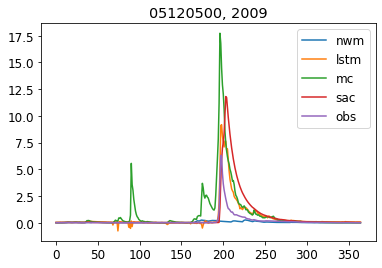

basin 04296000
recurrance_interval: 58.2342310831293


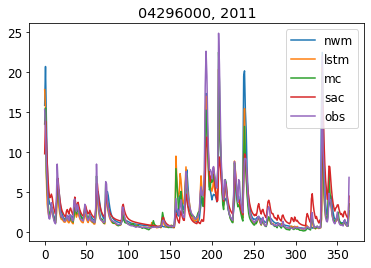

basin 05399500
basin 05362000
RI is None, Skipping
basin 05408000
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 05458000
recurrance_interval: 135.83111688202897


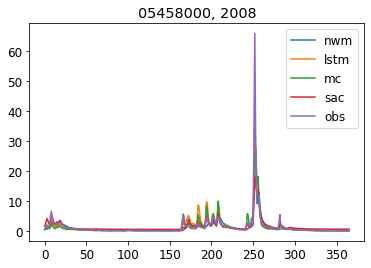

basin 05414000
basin 05413500
water year not in record
basin 05393500
water year not in record
basin 05454000
basin 05466500
basin 05487980
RI is None, Skipping
RI is None, Skipping
basin 05488200
RI is None, Skipping
basin 05444000
basin 05489000
RI is None, Skipping
basin 05501000
basin 05495000
recurrance_interval: 105.45495553550714


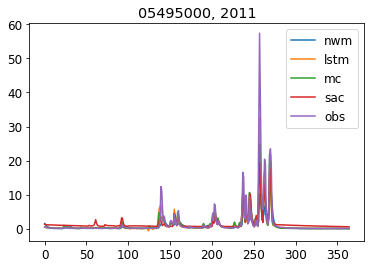

basin 05503800
basin 05495500
recurrance_interval: 68.98804168541011


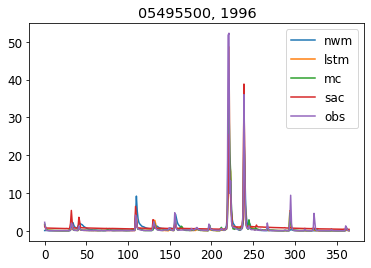

RI is None, Skipping
recurrance_interval: 72.73672964462438


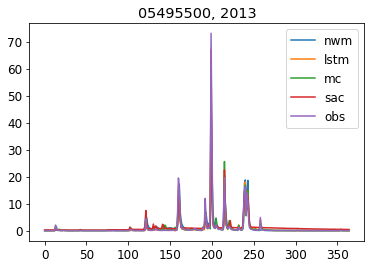

basin 05508805
RI is None, Skipping
RI is None, Skipping
basin 05525500
basin 05556500
recurrance_interval: 59.79073243647235


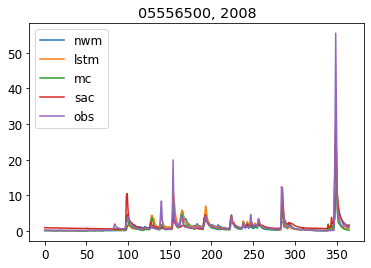

water year not in record
basin 05584500
basin 05591550
basin 05592050
basin 05592575
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 05593575
basin 05593900
recurrance_interval: 100.3607530371882


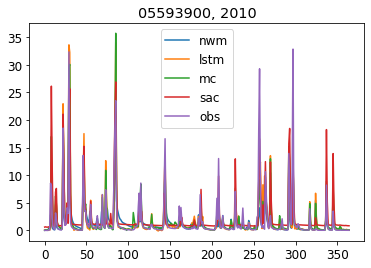

basin 05595730
basin 06221400
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 06224000
basin 06278300
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
recurrance_interval: 69.78902639033845


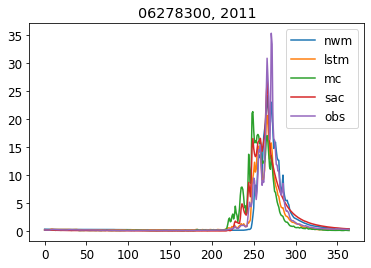

RI is None, Skipping
RI is None, Skipping
basin 06291500
RI is None, Skipping
recurrance_interval: 109.69591970846527


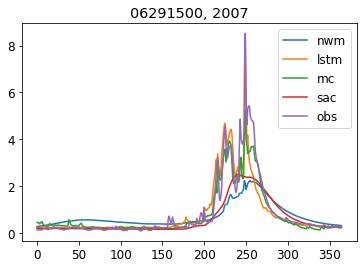

water year not in record
water year not in record
water year not in record
water year not in record
basin 06280300
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 06289000
basin 06339100
basin 06350000
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 06332515
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 06311000
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 06344600
RI is None, Skipping
basin 06404000
basin 06406000
recurrance_interval: 167.72078617535533


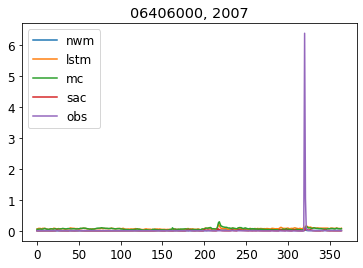

basin 06440200
RI is None, Skipping
RI is None, Skipping
basin 06479215
basin 06352000
basin 06601000
basin 06409000
RI is None, Skipping
basin 06470800
basin 06431500
basin 06477500
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 06614800
recurrance_interval: 51.40845070422534


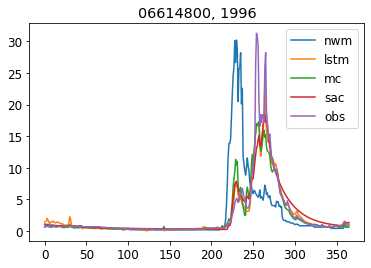

basin 06622700
RI is None, Skipping
recurrance_interval: 96.13914876795364


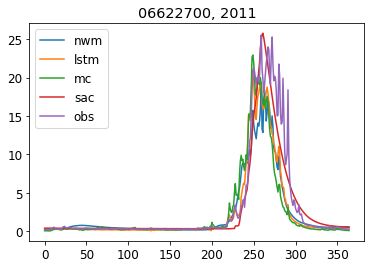

basin 06632400
recurrance_interval: 52.25263571475349


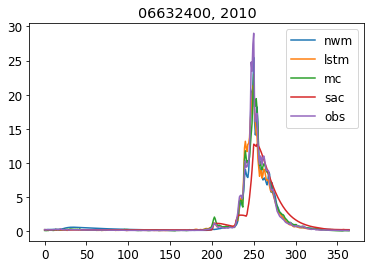

basin 06803530
RI is None, Skipping
RI is None, Skipping
basin 06623800
recurrance_interval: 86.75252989880407


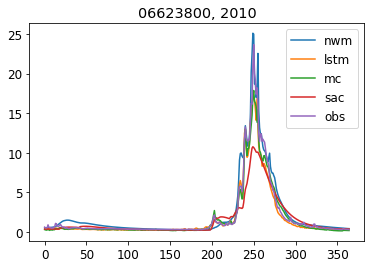

recurrance_interval: 59.694788679041054


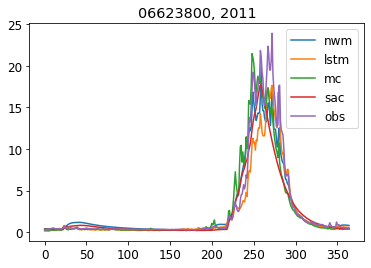

basin 06803510
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 06847900
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 06746095
basin 06814000
basin 06876700
basin 06878000
RI is None, Skipping
RI is None, Skipping
basin 06879650
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, S

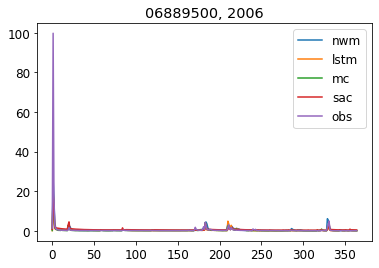

basin 06892000
recurrance_interval: 118.7623014601547


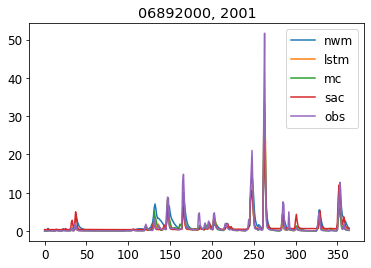

recurrance_interval: 67.415095579058


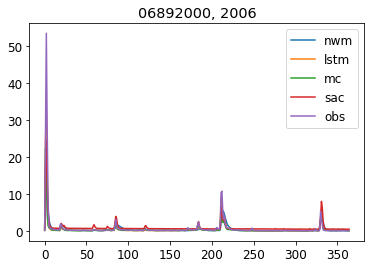

basin 06903400
basin 06906800
RI is None, Skipping
basin 06910800
RI is None, Skipping
RI is None, Skipping
basin 06917000
recurrance_interval: 212.91419832927207


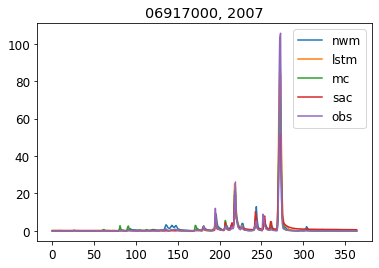

basin 06918460
basin 06921070
RI is None, Skipping
basin 06921200
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 07057500
RI is None, Skipping
basin 07060710
basin 07145700
basin 07083000
RI is None, Skipping
basin 07142300
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 07180500
basin 07196900
basin 07195800
basin 07208500
RI is None, Skipping
basin 07261000
RI is None, Skipping
basin 07263295
RI is None, Skipping
basin 07184000
basin 07291000
RI is None, Skipping
basin 07299670
basin 07301410
basin 07346045
basin 07315200
basin 07340300
recurrance_interval: 52.58659689192658


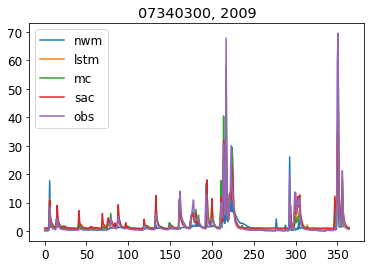

basin 07315700
RI is None, Skipping
basin 07335700
RI is None, Skipping
RI is None, Skipping
basin 07362100
RI is None, Skipping
basin 07362587
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 07375000
basin 08013000
basin 08023080
RI is None, Skipping
basin 08050800
basin 08070000
basin 08082700
recurrance_interval: 54.4790430097708


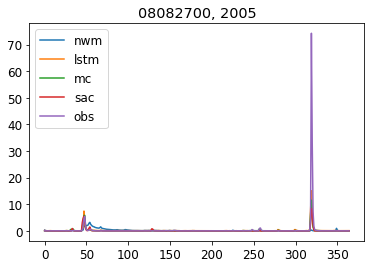

RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 08086290
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 08103900
basin 08086212
basin 08101000
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 08150800
basin 08158700
RI is None, Skipping
basin 08158810
basin 08171300
basin 08165300
basin 08164600
basin 08176900
RI is None, Skipping
basin 08178880
basin 08195000
basin 08190000
basin 08189500
basin 08194200
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 08200000
basin 08269000
basin 08267500
basin 08324000
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 08271000
basin 08377900
basin 08380500
basin 08378500
basin 09035800
water year not in record
water year not in record
basin 09035900
basin 09047700
basin 09065500
recur

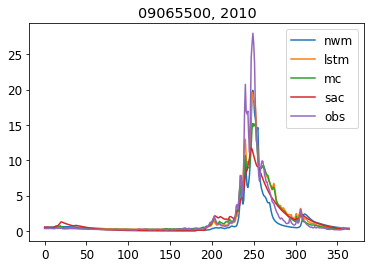

recurrance_interval: 85.78659909909906


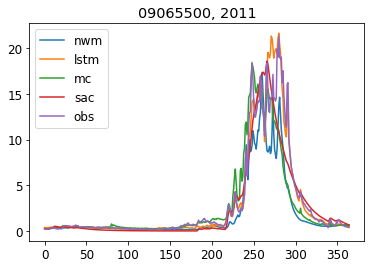

basin 09066000
basin 09066200
RI is None, Skipping
RI is None, Skipping
recurrance_interval: 219.12455301365742


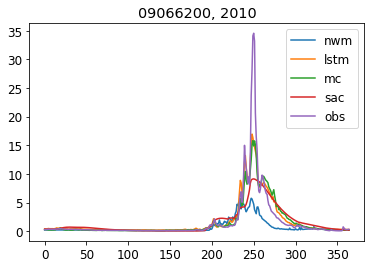

RI is None, Skipping
basin 09066300
recurrance_interval: 382.2164684167351


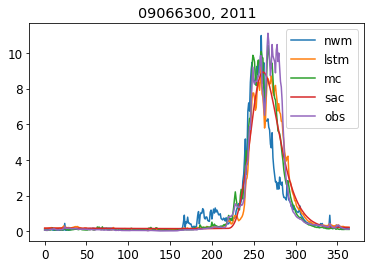

RI is None, Skipping
basin 09081600
RI is None, Skipping
recurrance_interval: 181.38797690478884


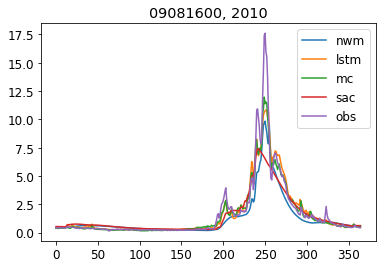

RI is None, Skipping
basin 09107000
basin 09210500
basin 09223000
basin 09306242
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 09430600
basin 09386900
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 09352900
RI is None, Skipping
recurrance_interval: 66.67746894971664


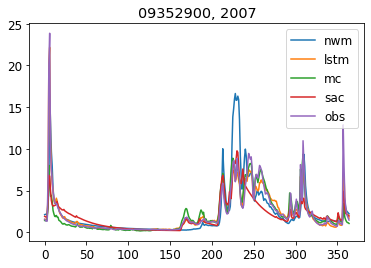

RI is None, Skipping
basin 09312600
basin 09484600
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 09378170
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 09447800
basin 09505350
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 09497980
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 09505800
basin 09492400
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 09494000
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
recurrance_interval: 158.53454806814432


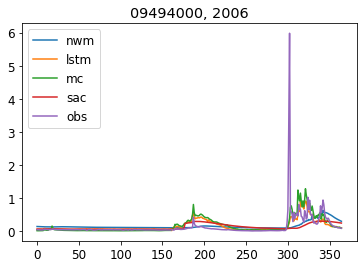

RI is None, Skipping
basin 09508300
RI is None, Skipping
basin 09510200
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 09513780
basin 09512280
RI is None, Skipping
basin 10259000
basin 10244950
basin 10234500
basin 10336645
basin 11124500
basin 11141280
basin 10343500
recurrance_interval: 109.58358930526992


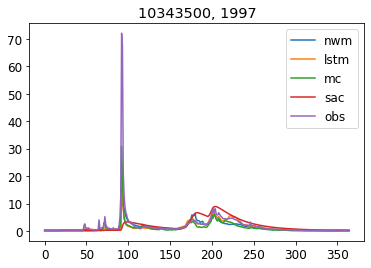

basin 10336660
basin 11143000
basin 11148900
basin 11151300
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 11176400
RI is None, Skipping
basin 11230500
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 11237500
recurrance_interval: 149.6358867808849


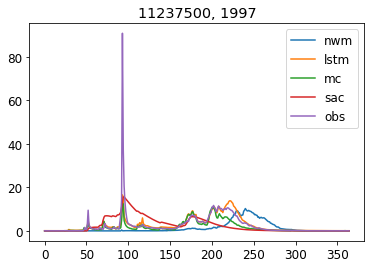

basin 11264500
recurrance_interval: 99.95442886345586


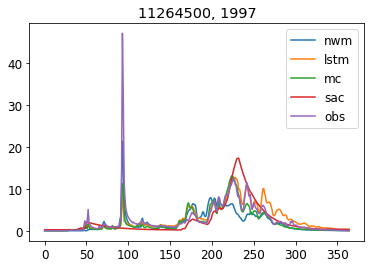

basin 11266500
recurrance_interval: 131.54399124863258


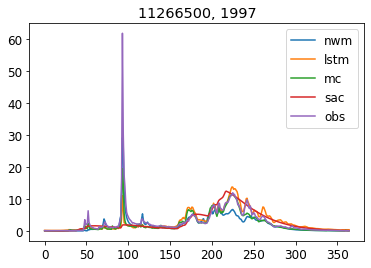

basin 11284400
basin 11468500
basin 11451100
basin 11381500
recurrance_interval: 57.62896089614075


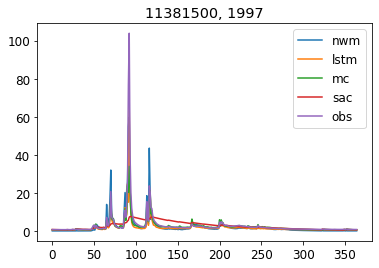

RI is None, Skipping
RI is None, Skipping
basin 11475560
basin 11473900
recurrance_interval: 82.3575239624156


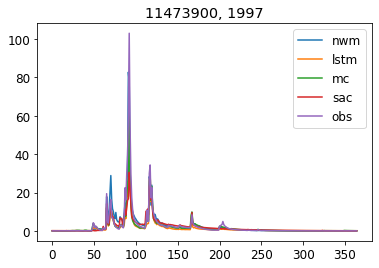

basin 11476600
basin 11478500
basin 11482500
basin 11480390
basin 11522500
basin 11528700
basin 11523200
basin 12013500
RI is None, Skipping
recurrance_interval: 109.53766074709115


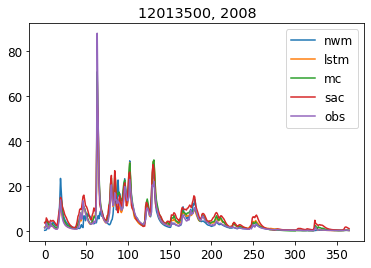

basin 12020000
RI is None, Skipping
recurrance_interval: 928.8114018613581


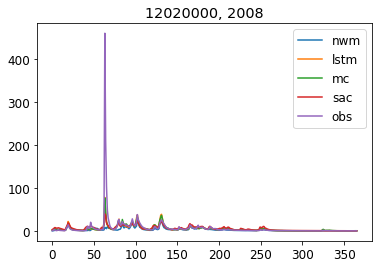

basin 12010000
recurrance_interval: 100.83288263926454


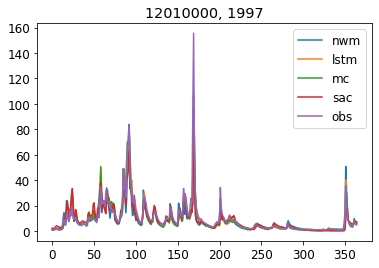

RI is None, Skipping
recurrance_interval: 198.18280151433214


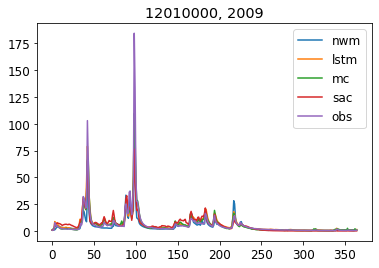

basin 12025700
recurrance_interval: 62.91393413087346


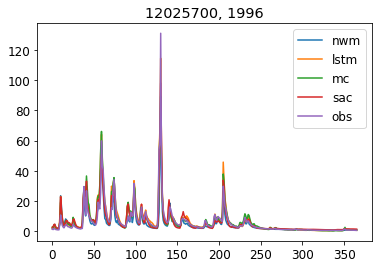

recurrance_interval: 106.79627149610204


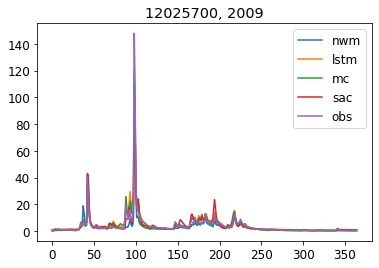

basin 12041200
basin 12040500
recurrance_interval: 69.85602879424115


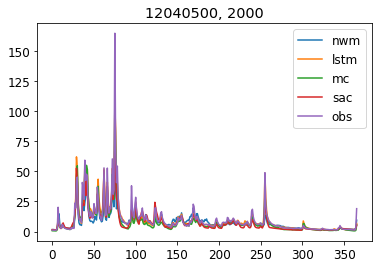

RI is None, Skipping
RI is None, Skipping
basin 12035000
recurrance_interval: 248.4838953195772


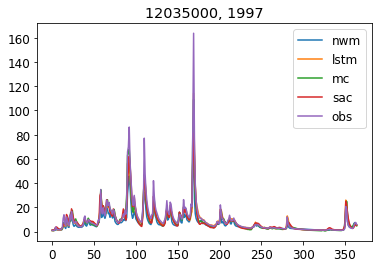

recurrance_interval: 67.39919681973063


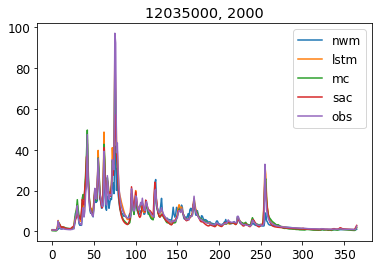

RI is None, Skipping
basin 12048000
basin 12054000
recurrance_interval: 80.80964891330305


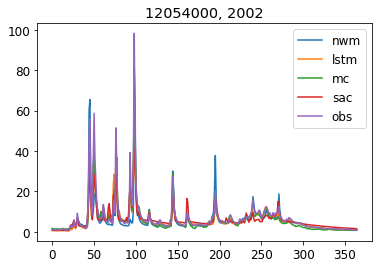

basin 12073500
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 12082500
recurrance_interval: 78.55170090939711


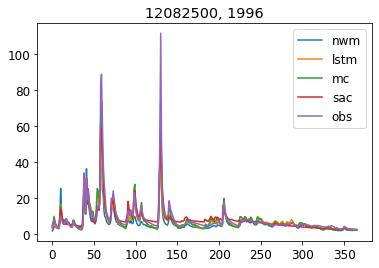

recurrance_interval: 88.65611316941732


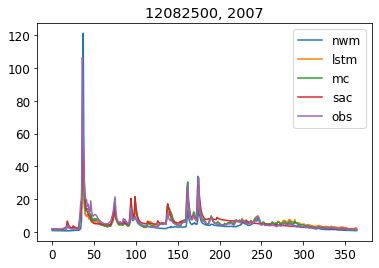

basin 12056500
recurrance_interval: 71.68928404305103


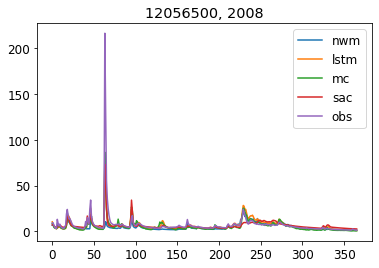

basin 12092000
recurrance_interval: 112.48131858747169


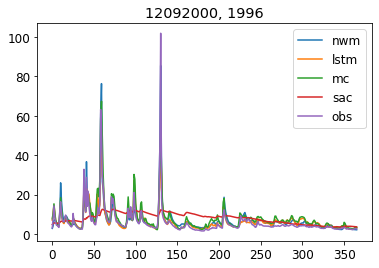

RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
recurrance_interval: 83.92832811009673


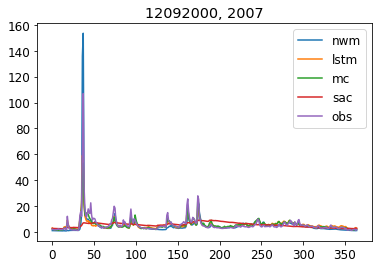

basin 12114500
basin 12117000
water year not in record
basin 12143600
recurrance_interval: 65.63025210084035


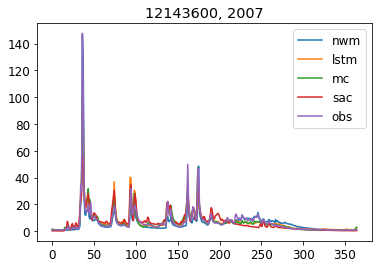

basin 12144000
recurrance_interval: 53.7027770828121


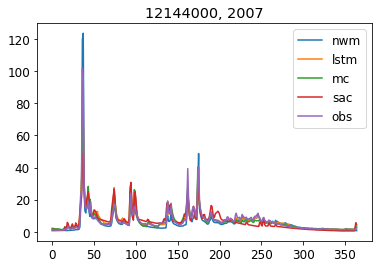

basin 12145500
basin 12147500
RI is None, Skipping
RI is None, Skipping
basin 12167000
RI is None, Skipping
recurrance_interval: 87.43706545193001


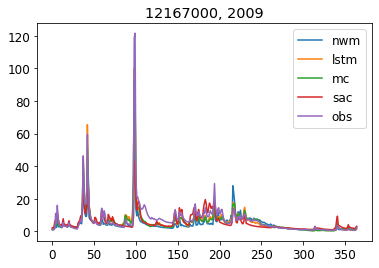

recurrance_interval: 275.75399947547874


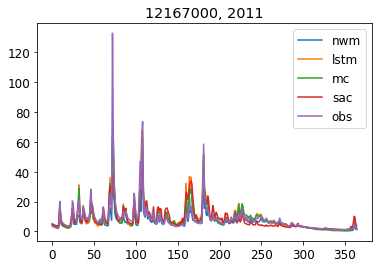

basin 12175500
RI is None, Skipping
recurrance_interval: 152.9762100621895


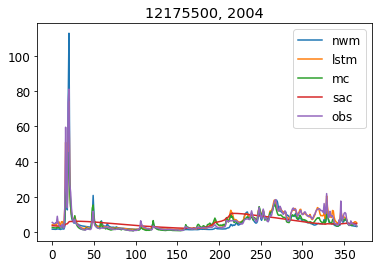

RI is None, Skipping
RI is None, Skipping
basin 12178100
basin 12186000
recurrance_interval: 126.88389825460177


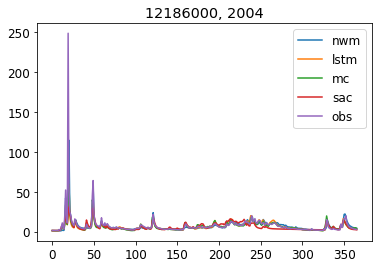

basin 12189500
recurrance_interval: 95.32501472569587


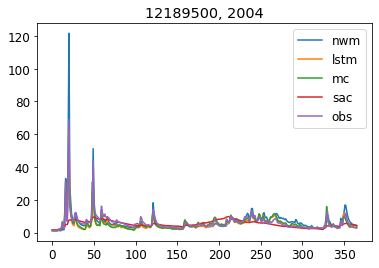

RI is None, Skipping
basin 12375900
recurrance_interval: 331.51357722867385


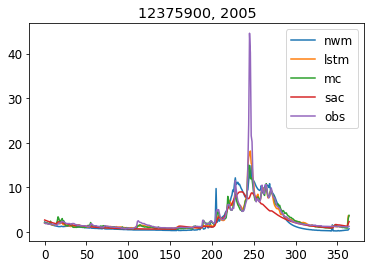

basin 12377150
basin 12381400
recurrance_interval: 115.78831312017643


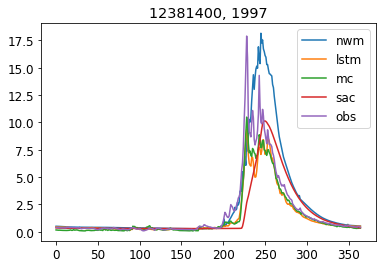

basin 12390700
recurrance_interval: 119.240962120121


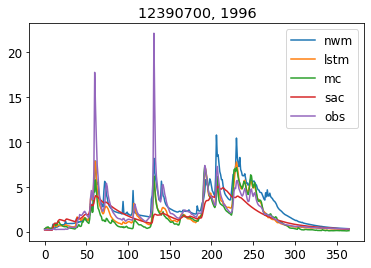

basin 12383500
water year not in record
water year not in record
water year not in record
basin 12447390
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 12488500
basin 12451000
recurrance_interval: 83.6771964461994


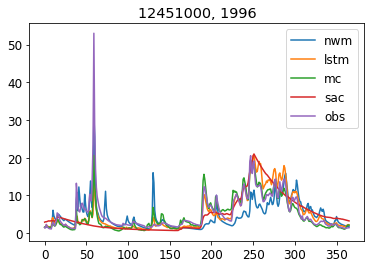

recurrance_interval: 458.9474825604512


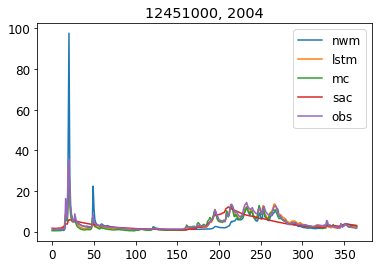

basin 13018300
basin 13011500
recurrance_interval: 176.86183522132745


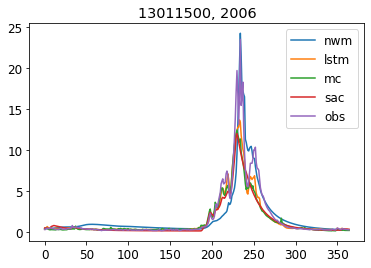

basin 13011900
basin 13161500
basin 13023000
basin 13235000
recurrance_interval: 51.34416418308258


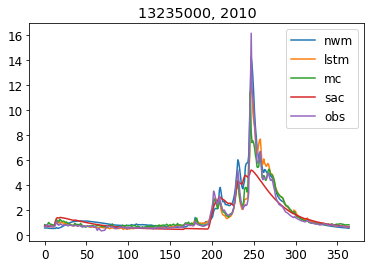

basin 13240000
water year not in record
recurrance_interval: 8246.249832082034


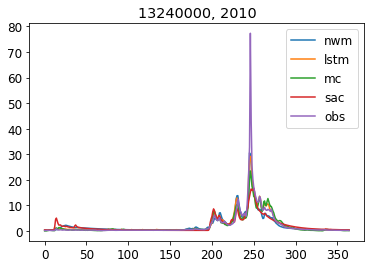

basin 13313000
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 14020000
recurrance_interval: 70.41509839767718


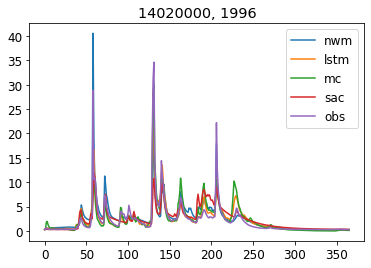

basin 13331500
basin 14096850
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 14137000
recurrance_interval: 99.02114647208245


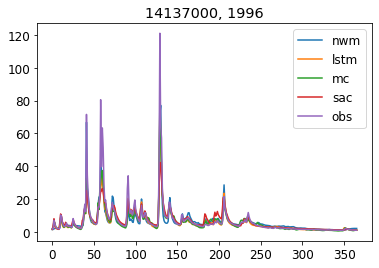

basin 14138870
recurrance_interval: 133.45959595959596


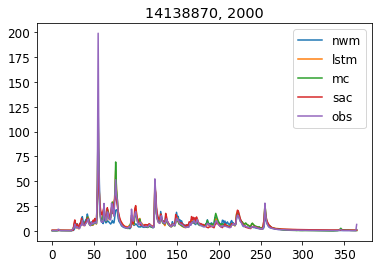

basin 14138800
RI is None, Skipping
basin 14138900
RI is None, Skipping
basin 14139800
RI is None, Skipping
basin 14141500
recurrance_interval: 50.72040801870086


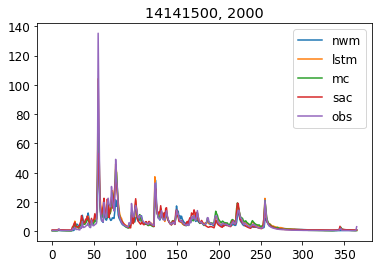

RI is None, Skipping
basin 14154500
recurrance_interval: 182.99002105648637


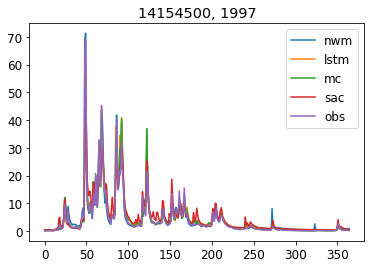

basin 14166500
basin 14158790
recurrance_interval: 55.99154710265821


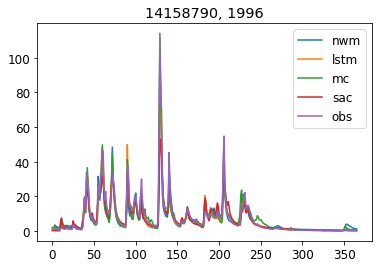

RI is None, Skipping
basin 14185000
recurrance_interval: 80.43352839363716


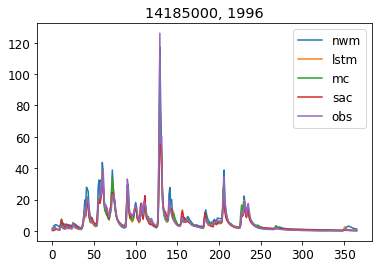

basin 14182500
recurrance_interval: 93.51292991310684


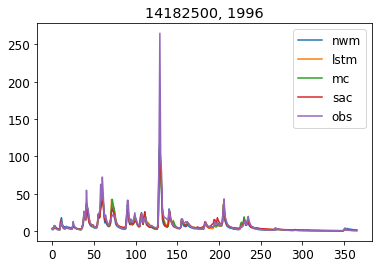

RI is None, Skipping
basin 14185900
recurrance_interval: 127.42584715521426


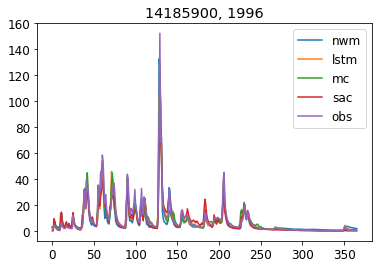

RI is None, Skipping
RI is None, Skipping
basin 14187000
RI is None, Skipping
basin 14216500
recurrance_interval: 288.33131333969413


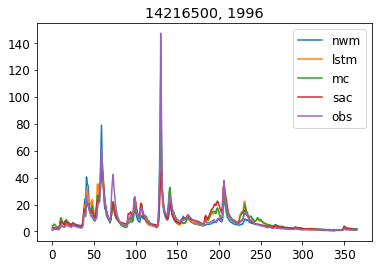

RI is None, Skipping
basin 14222500
recurrance_interval: 383.5097254004577


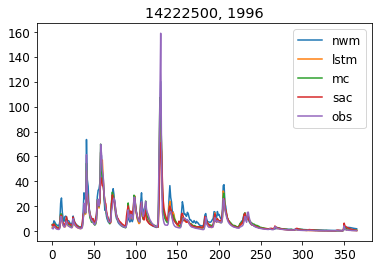

water year not in record
basin 14236200
recurrance_interval: 51.76431222242502


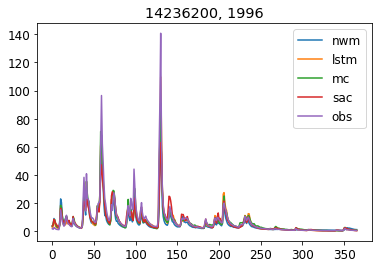

recurrance_interval: 110.02868827443078


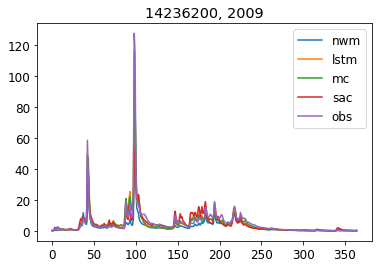

basin 14301000
recurrance_interval: 841.6208724407918


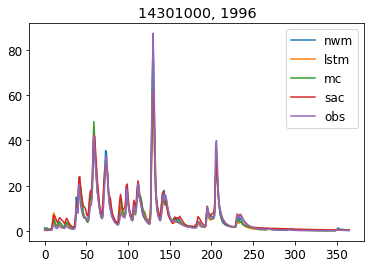

basin 14303200
basin 14305500
recurrance_interval: 55.57760260940475


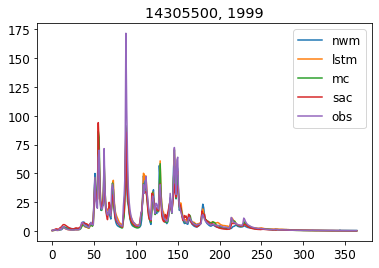

recurrance_interval: 719.8159475395379


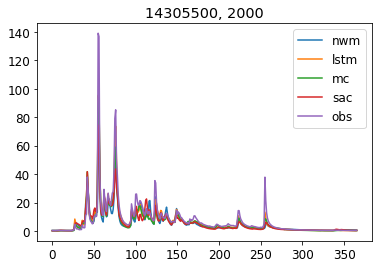

RI is None, Skipping
basin 14306500
basin 14306340
basin 14308990
RI is None, Skipping
basin 14309500
RI is None, Skipping
basin 14325000
recurrance_interval: 86.62191404704842


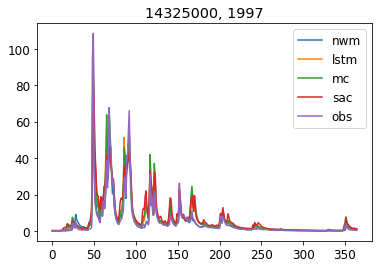

RI is None, Skipping
basin 14316700
RI is None, Skipping
basin 14362250
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
RI is None, Skipping
basin 14400000
recurrance_interval: 53.18717204863592


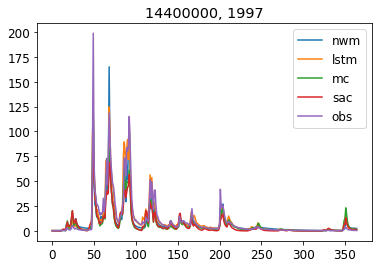

RI is None, Skipping


In [24]:
#-------------------------------------------------------------------------------------------------
# Set up lists to use in loops
models = ['nwm', 'lstm', 'mc', 'sac']
flows = ['nwm', 'lstm', 'mc', 'sac', 'obs']
models_obs_ri = ['nwm', 'lstm', 'mc', 'sac', 'obs', 'ri']
models_ri = ['nwm', 'lstm', 'mc', 'sac', 'ri']
#-------------------------------------------------------------------------------------------------


#-------------------------------------------------------------------------------------------------
load_data=False
dump_data=True
analysis_dict_name = 'frequency_analysis_dict_annual_MC_daily_nwm_sac_hp.pkl'
peak_flows_dict_name = 'peak_annual_flows_dictionary_annual_hp.pkl'
if load_data:
    with open(analysis_dict_name, 'rb') as fb:
        analysis_dict_all = pkl.load(fb)
    with open(peak_flows_dict_name, 'rb') as fb:
        peak_flows_dict = pkl.load(fb)
else:
    analysis_dict_all = {}
    peak_flows_dict = {i:[] for i in models_obs_ri}
#-------------------------------------------------------------------------------------------------


for train_split_type in ['time_split', 'return_period_split']:

    #-------------------------------------------------------------------------------------------------
    #-----LOOP THROUGH BASINS------------------------------------------------------------------------
    #-------------------------------------------------------------------------------------------------

    for ib, basin_0str in enumerate(basin_list): 
        basin_int = int(basin_0str)
        print('basin', basin_0str)

        #-------------------------------------------------------------------------------------------------
        # Since we load in the dictionary, which should have some data filled in at least
        # Check to see if there is already some records, if there is, it must have been analyzed already
        if basin_0str in analysis_dict_all.keys():
            print('analysis for this basins has been done. Moving on.')
            continue
        #-------------------------------------------------------------------------------------------------


        #-------------------------------------------------------------------------------------------------
        # Get the NWM data for this basin in an xarray dataset.
        xr_nwm = xr.DataArray(train_split_type_model_set[train_split_type]['nwm'][basin_0str]['streamflow'].values, 
                 coords=[nwm_results[basin_0str]['streamflow'].index], 
                 dims=['datetime'])
        #-------------------------------------------------------------------------------------------------


        #-------------------------------------------------------------------------------------------------
        # Setting up the dictionary for the single basin results. Then will add to the overall dict.
        analysis_dict = {metric:{model:[] for model in models_ri} for metric in metrics.get_available_metrics()}
        extra_metrics = ['beta-abs', 'peakQ', 'peakRI', 'peakT', 'peakQ-perc', 'peakRI-perc', 'peakT-abs']
        for extra_metric in extra_metrics:
            analysis_dict[extra_metric] = {model:[] for model in models_ri}
        #-------------------------------------------------------------------------------------------------


        #-------------------------------------------------------------------------------------------------
        # We need the basin area to convert to CFS, to interpolate the RI from LPIII
        basin_area = pd_attributes.loc[basin_int, 'area_geospa_fabric']
        basin_str = return_period_tools.gauge_id_str(basin_int)
        #-------------------------------------------------------------------------------------------------


        #-------------------------------------------------------------------------------------------------
        # Get the log pearson III results
        b17 = return_period_tools.read_b17(basin_str)
        #-------------------------------------------------------------------------------------------------


        #-------------------------------------------------------------------------------------------------
        # Get the peak flows, but then cut them to just the validation year.
        peakflows = tools.read_peak_flows(basin_str)
        peakflows['wateryear'] = [int(tools.get_water_year(int(peakflows.iloc[i,0].split('-')[0]), 
                                  int(peakflows.iloc[i,0].split('-')[1]))) for i in range(peakflows.shape[0])]
        peakflows = pd.DataFrame(peakflows.set_index('wateryear'))
        #-------------------------------------------------------------------------------------------------


        #-------------------------------------------------------------------------------------------------
        #----  LOOP THROUGH THE WATER YEARS   ------------------------------------------------------------
        #-------------------------------------------------------------------------------------------------
        for water_year in range(1996, 2014):
            date_from = str(water_year-1)+'-10'
            date_to = str(water_year)+'-09'


            #-------------------------------------------------------------------------------------------------
            # Figure out what the actual recurrence interval is for the basin-year. 
            # We'll use this to categorize the basin-year, but then calc the metrics with the observations.
            if water_year not in list(peakflows.index.values):
                print("water year not in record")
                continue
            peak_date = peakflows.loc[water_year, 0]
            if isinstance(peakflows.loc[water_year, 1], str):
                print("something is wrong with water year peak flow, trying string with blank")
                peak_flow = float(peakflows.loc[water_year, 1].replace(" ", ""))
            else:
                peak_flow = peakflows.loc[water_year, 1]
            #-------------------------------------------------------------------------------------------------


            #-------------------------------------------------------------------------------------------------
            # Make dictionary with all the flows
            flow_mm = {}
            #-------------------------------------------------------------------------------------------------


            #-------------------------------------------------------------------------------------------------        
             # NWM data
            sim_nwm = xr_nwm.loc[date_from:date_to]
            # convert from CFS to mm/day
            # fm3/s * 3600 sec/hour * 24 hour/day / (m2 * mm/m)
            flow_mm['nwm'] = sim_nwm*3600*24/(basin_area*1000)
            #-------------------------------------------------------------------------------------------------
            # Standard LSTM 
            xrr = train_split_type_model_set[train_split_type]['lstm'][basin_0str]['1D']['xr']['QObs(mm/d)_sim']
            flow_mm['lstm'] = pd.DataFrame(data=xrr.values,index=xrr.date.values).loc[date_from:date_to]
            #-------------------------------------------------------------------------------------------------
            # Mass-conserving LSTM data trained on all years
            xrr = mclstm_results_0[basin_0str]['1D']['xr']['QObs(mm/d)_sim']
            flow_mm['mc'] = pd.DataFrame(data=xrr.values,index=xrr.date.values).loc[date_from:date_to]
            #-------------------------------------------------------------------------------------------------        
            # SACSMA 
            df = train_split_type_model_set[train_split_type]['sac'][basin_0str]
            flow_mm['sac'] = df.loc[date_from:date_to]
            #-------------------------------------------------------------------------------------------------
            # OBSERVATIONS
            xrr = train_split_type_model_set[train_split_type]['mc'][basin_0str]['1D']['xr']['QObs(mm/d)_obs']
            flow_mm['obs'] = pd.DataFrame(data=xrr.values,index=xrr.date.values).loc[date_from:date_to]
            #-------------------------------------------------------------------------------------------------


            #-------------------------------------------------------------------------------------------------
            # Get the max flow and the location of the max flow. Make them all of same type (np.array).
            max_flow_mm = {flow:np.array(flow_mm[flow].max()) for flow in flows}
            #-------------------------------------------------------------------------------------------------


            #-------------------------------------------------------------------------------------------------
            # Skip basin years that do not have data
            if np.isnan(max_flow_mm['obs']):
                print('no data, skipping')
                continue
            #-------------------------------------------------------------------------------------------------


            #-------------------------------------------------------------------------------------------------
            # Get the location of the max flow within the year. If cannot get this value, then need to skip yr
            try:
                max_loc = flow_mm['obs'].values.argmax()
            except:
                print('cannot find max loc, skipping')
                continue
            #-------------------------------------------------------------------------------------------------


            #-------------------------------------------------------------------------------------------------
            # Set the event window around the peak flow
            event_window_days = 10
            max_event_start = pd.Timestamp(date_from) + pd.Timedelta(max_loc - event_window_days, 'day')
            max_event_end = pd.Timestamp(date_from) + pd.Timedelta(max_loc + event_window_days, 'day')
            #-------------------------------------------------------------------------------------------------


            #-------------------------------------------------------------------------------------------------
            # Get the peak flows within the event window
            max_flow_cfs={}
            for iflow in flows:
                max_flow_cfs[iflow] = np.min([np.max([max_flow_mm[iflow] * \
                                                      basin_area * conversion_factor, 0]),b17.max()])
            #-------------------------------------------------------------------------------------------------


            #-------------------------------------------------------------------------------------------------
            # Calculate the recurrence interval of the maximum annual flow from the log pearson III
            ri={}
            ri['ri'] = tools.interpolate_ri(peak_flow, b17)
            for iflow in flows:
                ri[iflow] = tools.interpolate_ri(max_flow_cfs[iflow], b17)
            #-------------------------------------------------------------------------------------------------


            #-------------------------------------------------------------------------------------------------
            # The recurrence interval will be None if the flow is too low.
            # We can skip over flows that are too low, because we have plenty of those in our sample
            bad_ri_value_continue = False
            for iflow in ri.keys():
                if not ri[iflow]:
                    print('RI is None, Skipping')
                    bad_ri_value_continue = True
                    break
            if bad_ri_value_continue:
                continue
            #-------------------------------------------------------------------------------------------------


            #-------------------------------------------------------------------------------------------------
            # Get all the peak flow values into one place.
            for iflow in flows:
                peak_flows_dict[iflow].append(np.max([max_flow_mm[iflow]]))
            peak_flows_dict['ri'].append(ri['obs'])
            #-------------------------------------------------------------------------------------------------


            #-------------------------------------------------------------------------------------------------
            # Make all xarray data similar
            for iflow in flows:
                if iflow == 'nwm': #already in the correct format
                    continue
                if iflow == 'sac': 
                    flow_mm[iflow] = xr.DataArray(np.array(flow_mm[iflow].values, dtype='float32'), 
                                   coords=dict(datetime=flow_mm[iflow].index.values), dims=['datetime'])
                else:
                    flow_mm[iflow] = xr.DataArray(flow_mm[iflow].values[:,0], 
                                   coords=dict(datetime=flow_mm[iflow].index.values), dims=['datetime'])
            #-------------------------------------------------------------------------------------------------


            #-------------------------------------------------------------------------------------------------
            if flow_mm['mc'].sum() > 0 and flow_mm['obs'].sum() > 0:
                # This function loops through the metrics and calculates them.
                calculate_all_metrics_for_frequency_analysis(analysis_dict, flow_mm, ri['ri'])
            else:
                continue
            #-------------------------------------------------------------------------------------------------


            #-------------------------------------------------------------------------------------------------
            # Calculate the 'simple' flow and timing error. Just peak differences.
            for extra_metric in extra_metrics:
                analysis_dict[extra_metric]['ri'].append(ri['ri'])
            #-------------------------------------------------------------------------------------------------


            #-------------------------------------------------------------------------------------------------
            for iflow in models:
                max_obs_loc = flow_mm['obs'].argmax().values
                sim_max_window = flow_mm[iflow][np.max([0,max_obs_loc-10]):np.min([365,max_obs_loc+10])]
                max_sim_loc = max_obs_loc + (sim_max_window.argmax().values - 10)
                analysis_dict['peakT'][iflow].append(max_sim_loc - max_obs_loc)
            #-------------------------------------------------------------------------------------------------


            #-------------------------------------------------------------------------------------------------
            for iflow in models:
                analysis_dict['peakRI'][iflow].append(ri[iflow] - ri['obs'])
            #-------------------------------------------------------------------------------------------------


            #-------------------------------------------------------------------------------------------------
            for iflow in models:
                analysis_dict['peakRI-perc'][iflow].append(np.abs(ri[iflow] - ri['obs'])/ri['obs'])
            #-------------------------------------------------------------------------------------------------


            #-------------------------------------------------------------------------------------------------
            for iflow in models:
                analysis_dict['peakQ'][iflow].append((flow_mm[iflow].max().values - flow_mm['obs'].max().values) * \
                                                         basin_area * conversion_factor)
            #-------------------------------------------------------------------------------------------------


            #-------------------------------------------------------------------------------------------------
            for iflow in models:
                analysis_dict['peakQ-perc'][iflow].append(np.abs(flow_mm[iflow].max().values - \
                                                                 flow_mm['obs'].max().values) / \
                                                                 flow_mm['obs'].max().values)
            #-------------------------------------------------------------------------------------------------


            #-------------------------------------------------------------------------------------------------
            for iflow in models:
                max_obs_loc = flow_mm['obs'].argmax().values
                sim_max_window = flow_mm[iflow][np.max([0,max_obs_loc-10]):np.min([365,max_obs_loc+10])]
                max_sim_loc = max_obs_loc + (sim_max_window.argmax().values - 10)
                analysis_dict['peakT-abs'][iflow].append(np.abs(max_sim_loc - max_obs_loc))
            #-------------------------------------------------------------------------------------------------


            #------------------------------------------------------------------------------------------------- 
            for iflow in models:
                analysis_dict['beta-abs'][iflow].append(np.abs(analysis_dict['Beta-NSE'][iflow][-1]))
            #-------------------------------------------------------------------------------------------------        

            #------------------------------------------------------------------------------------------------- 
            if ri['ri'] > 50:
                print('recurrance_interval:', ri['ri'])
                for iflow in flows:
                    plt.plot(flow_mm[iflow], label=iflow)
                plt.title('{}, {}'.format(basin_0str, water_year))
                plt.legend()
                plt.show()
                plt.close()
            #------------------------------------------------------------------------------------------------- 

        #-------------------------------------------------------------------------------------------------
        #Now that the basin has been analyzed successfully, add it to the larger dictionary
        analysis_dict_all[basin_0str] = analysis_dict
        #------------------------------------------------------------------------------------------------- 

        
#-------------------------------------------------------------------------------------------------
if dump_data:
    with open(analysis_dict_name, 'wb') as fb:
        pkl.dump(analysis_dict_all, fb)
    with open(peak_flows_dict_name, 'wb') as fb:
        pkl.dump(peak_flows_dict, fb)